In [59]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(39)

In [33]:
#set mean, standard deviation(sigma) and size
my_mean = 10
sigma = 2
N_samples = 1000
sample_len = 100

The laplace distribution takes in two parameters: $ \mu $ and $b$

$ \mu $ is the mean, mode, and median and $b$ is scaling constant

To find $b$ given the mean and standard deviation we can solve for it knowing the variance is $2b^2$ and the standard deviation squared is the variance.


$ 2b^2 = \sigma ^ 2$ 

In [47]:
# set mu and b
my_mu = my_mean
my_b = np.sqrt((sigma ** 2) / 2)
# make sure my_b is sqrt(2) for sigma = 2
print(my_b)

1.41421356237


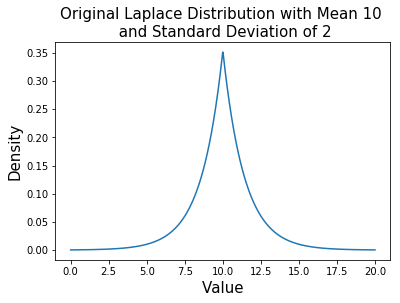

In [56]:
# plot the original distribution
x = np.linspace(0, 20, 1000)
y = (1 / (2 * my_b)) * np.exp(-(np.abs(x - my_mean)) / my_b)
pl.plot(x, y)
plt.title('Original Laplace Distribution with Mean 10 \n and Standard Deviation of 2', fontsize = 15)
plt.xlabel('Value', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

Figure 1: The original Laplace distribution that we will draw out samples from

In [34]:
# Generate Samples from distribution
sample_df = np.zeros((N_samples, sample_len))
for i in range(N_samples): 
   sample_df[i] = np.random.laplace(loc=my_mu, scale=my_b, size=sample_len)

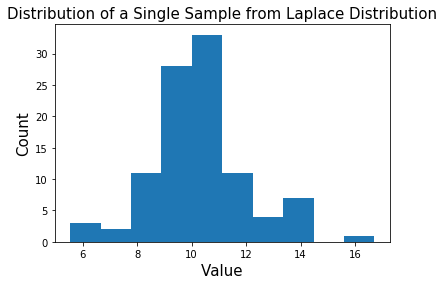

In [57]:
# plot one of the samples
pl.hist(sample_df[5])
plt.title('Distribution of a Single Sample from Laplace Distribution', fontsize = 15)
plt.xlabel('Value', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Figure 2: Histogram of one sample of values taken from our Laplace ditribution

In [68]:
# Get a z-statistic for each sample
z_array = np.zeros((N_samples, 1))
for i in range(len(z_array)):
    z_array[i] = (my_mean - np.mean(sample_df[i])) / (sigma / np.sqrt(sample_len))

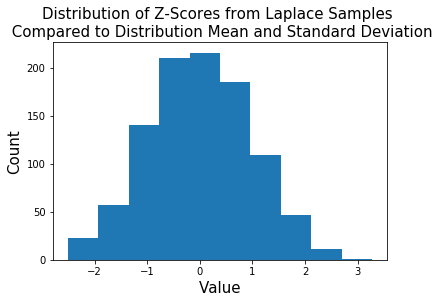

In [71]:
# plot Histogram of Z Scores
pl.hist(z_array)
plt.title('Distribution of Z-Scores from Laplace Samples \n Compared to Distribution Mean and Standard Deviation', fontsize = 15)
plt.xlabel('Value', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


Figure 3: Distribution of Z-scores from each sample versus the original distribution

In [70]:
# test whether or not you can reject the null hypothesis that the distribution is a gaussian
sp.stats.kstest(z_array, 'norm')

KstestResult(statistic=0.9994791289406757, pvalue=0.0)

Since the p-val is less than 0.05 we can reject the Null hypothesis that the distrution of the z-scores is not gaussian!
